# Data Visualization using Python

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm, gaussian_kde
from scipy import integrate
from scipy.stats import shapiro

## Density Plot

1. A density plot, also known as a kernel density plot or KDE, is a graphical representation of the underlying probability density function (PDF) of a continuous random variable.
2. Unlike histograms, which use bars to represent data, density plots use a smooth curve to approximate the distribution and estimate the probability density at different values.
3. The curve in a density plot is constructed by placing a kernel (such as a Gaussian kernel) on each data point and summing up their contributions to obtain the density estimate.
4. It provides a more detailed and continuous representation of the data distribution, allow to visualize features such as peaks, valleys, skewness, and multimodality.
5. It is particularly helpful when dealing with large datasets or when the underlying distribution is not easily captured by traditional histogram bins.
6. It can be used in exploratory data analysis to identify patterns, compare multiple distributions, and detect outliers or anomalies.

#### Use a dataset generated randomly from a normal distribution

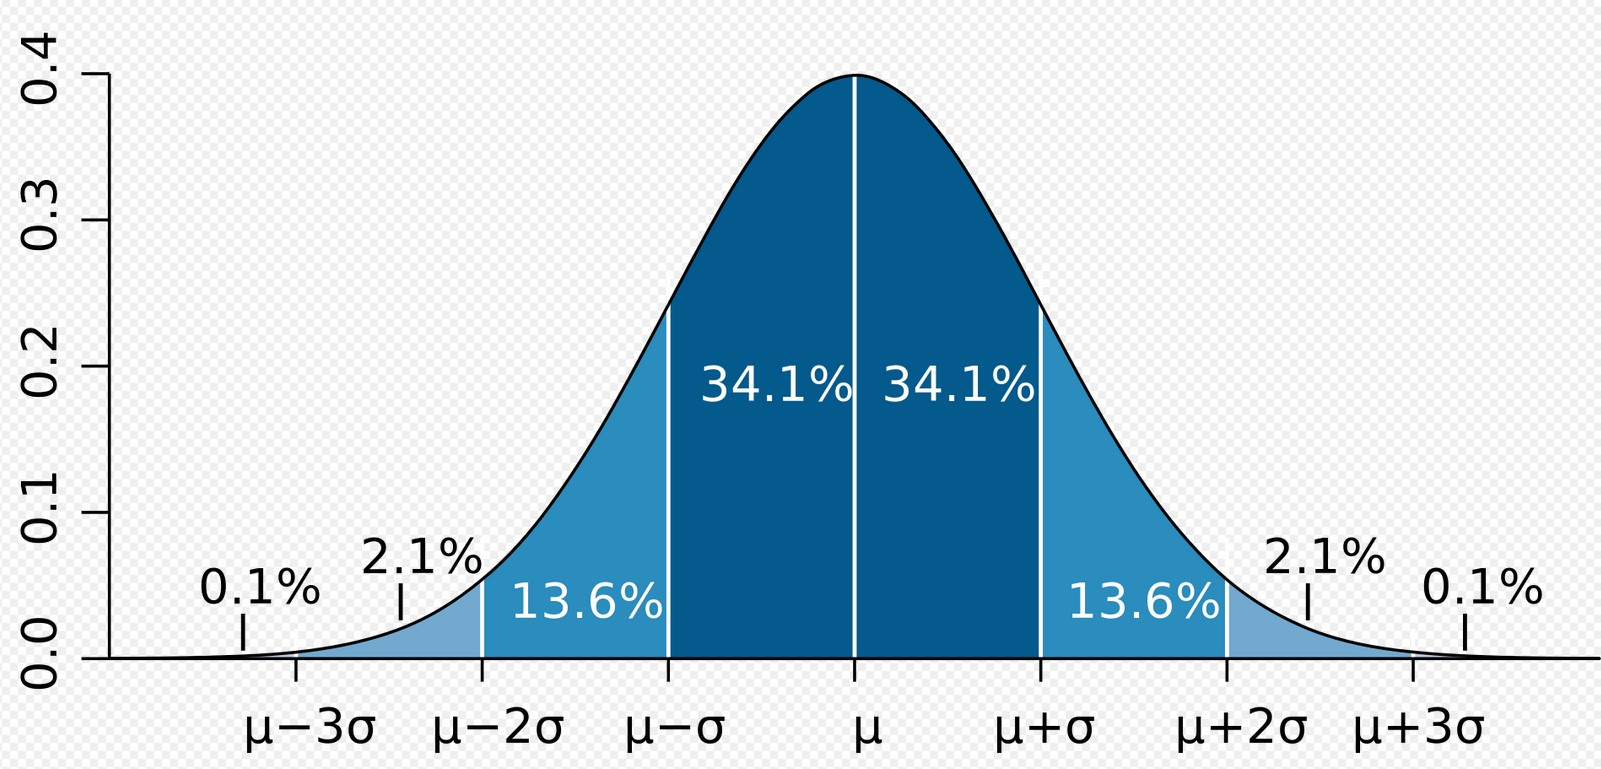

For the normal distribution, the values less than one standard deviation away from the mean account for 68.27% of the set; while two standard deviations from the mean account for 95.45%; and three standard deviations account for 99.73%.

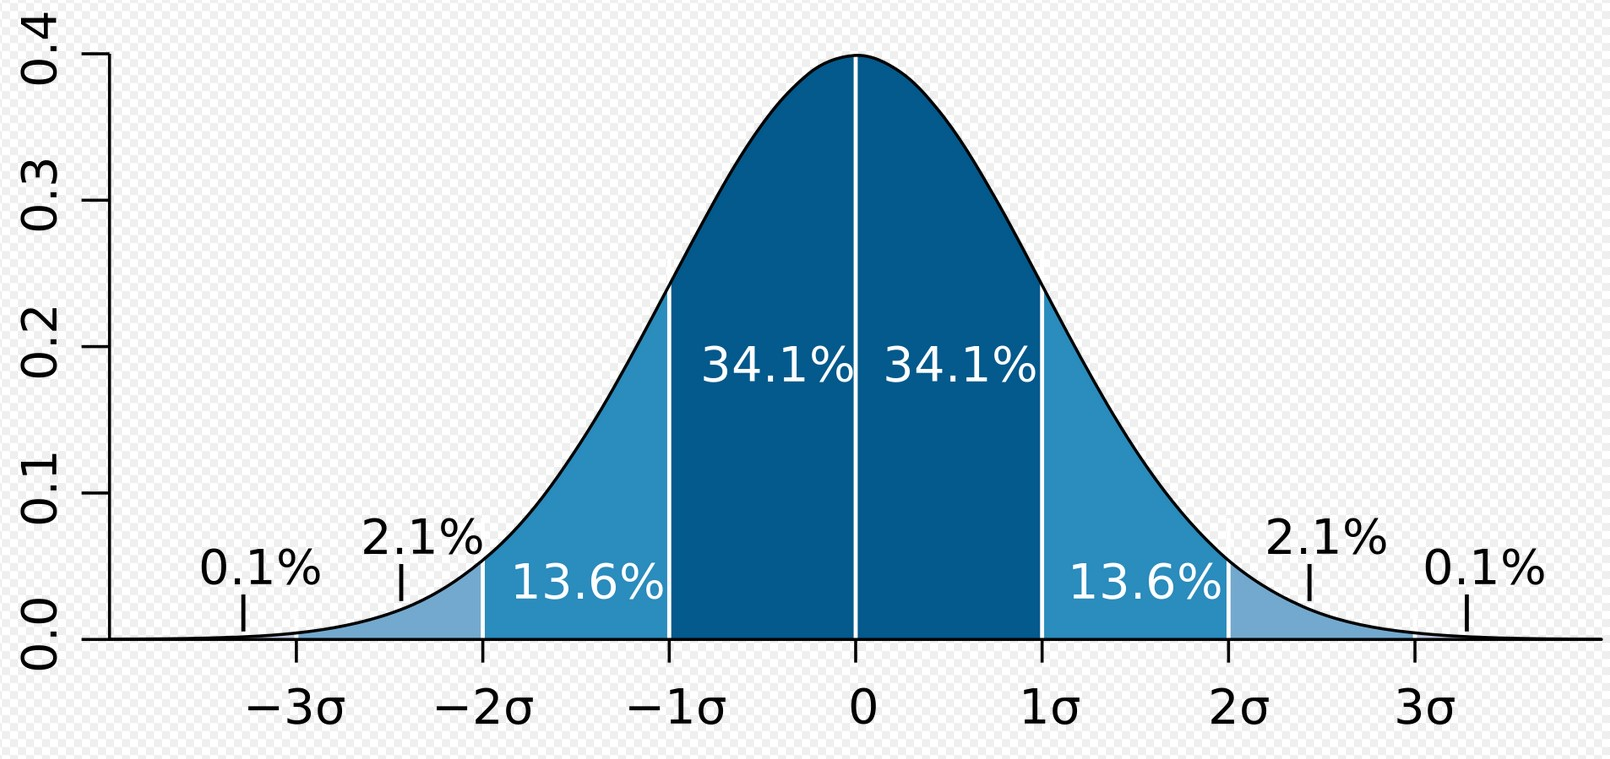

Probability density function of a normal distribution

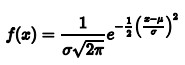

The red curve is the standard normal distribution

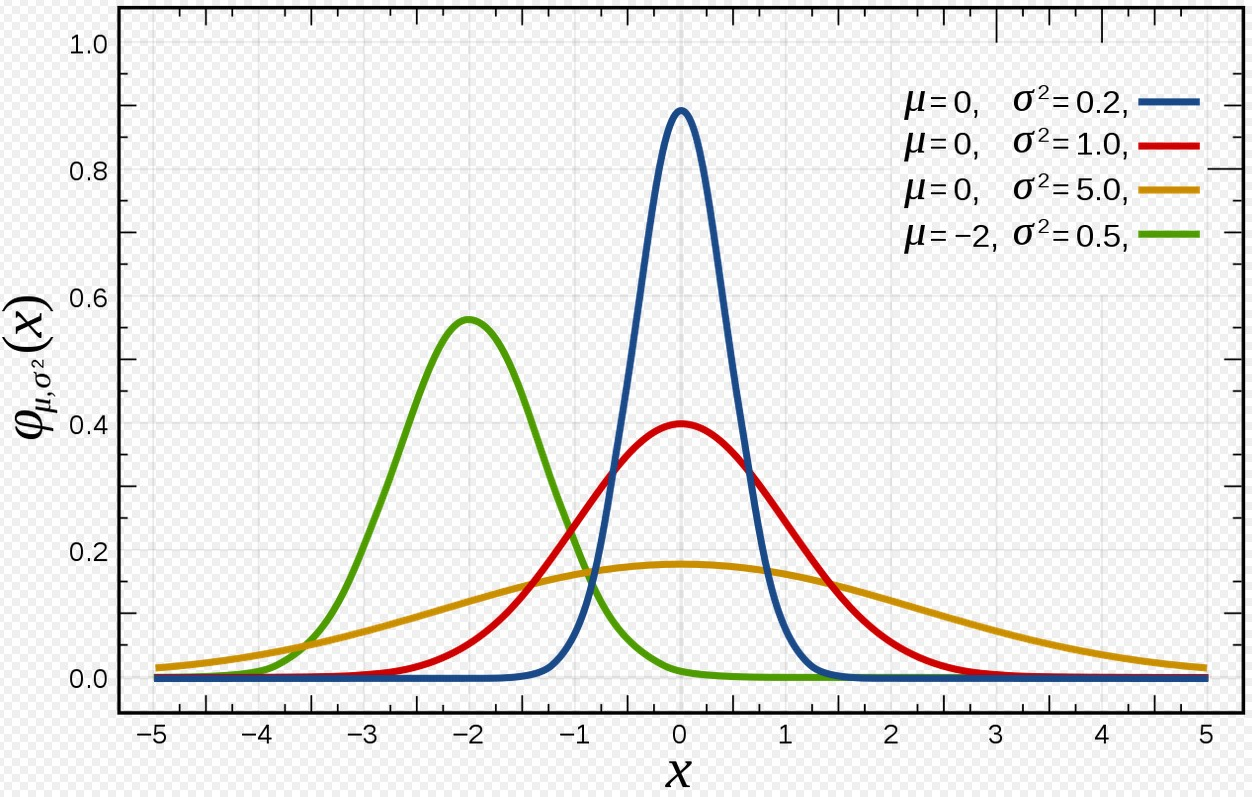

Cummulative distribution function of a normal distribution

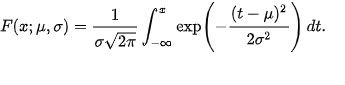

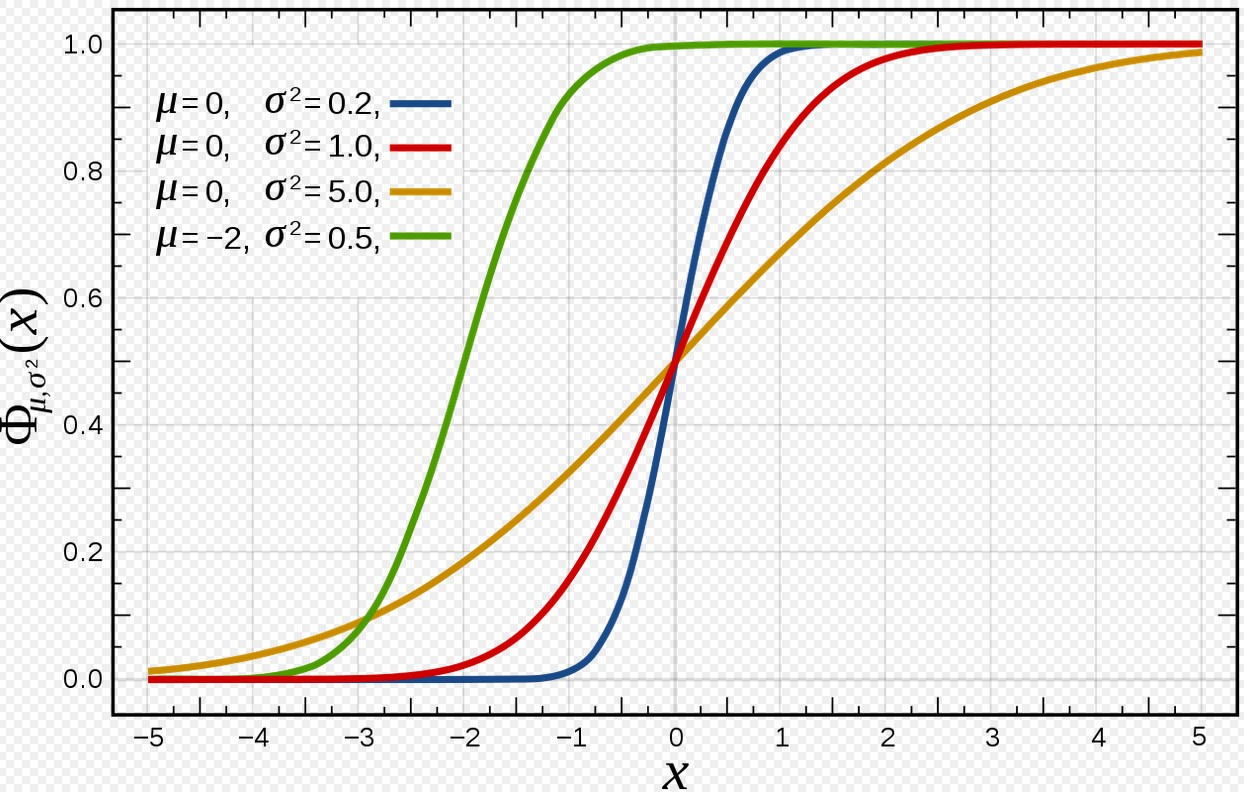

Z-table: <a href="https://en.wikipedia.org/wiki/Standard_normal_table">Standard normal table</a>

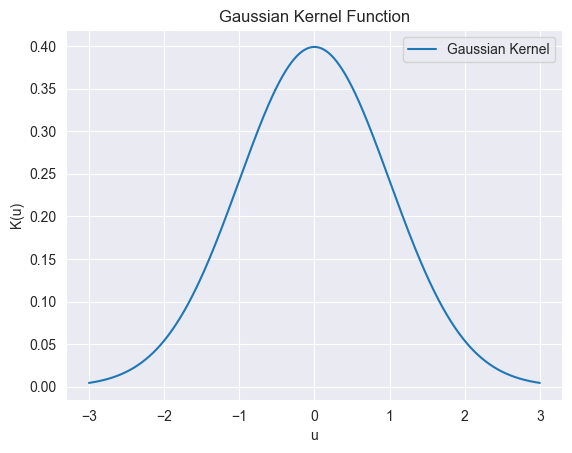

In [2]:
# Gaussian kernel function
def gaussian_kernel(u):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * u**2)

# Generate values of u
u_values = np.linspace(-3, 3, 1000)

# Calculate the corresponding kernel values
kernel_values = gaussian_kernel(u_values)

# Plot the Gaussian kernel
plt.plot(u_values, kernel_values, label='Gaussian Kernel')
plt.title('Gaussian Kernel Function')
plt.xlabel('u')
plt.ylabel('K(u)')
plt.legend()
plt.show()

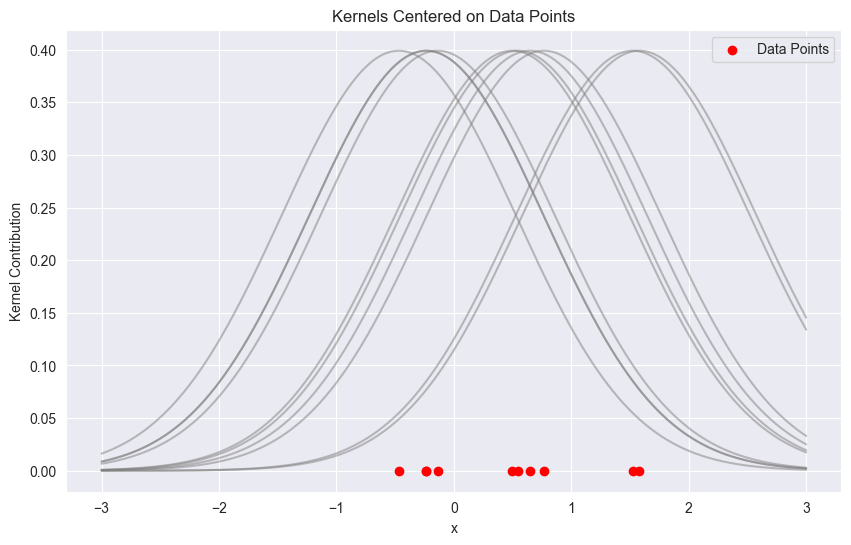

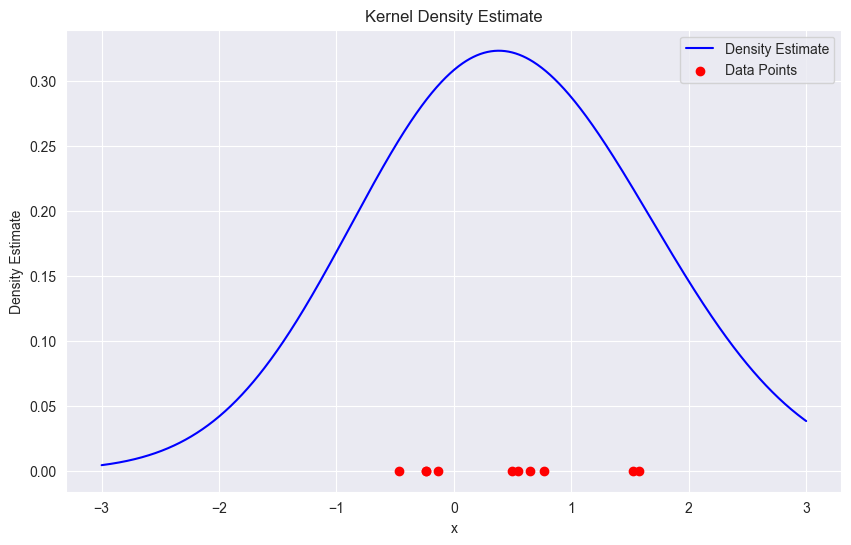

In [3]:
from scipy.stats import norm

# Generate a small dataset
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=10)

# Define the Gaussian kernel function
def gaussian_kernel(x, xi, bandwidth):
    return norm.pdf((x - xi) / bandwidth) / bandwidth

# Set bandwidth for the example
bandwidth = 1.0

# Plot each kernel centered on data points
x_values = np.linspace(-3, 3, 1000)
plt.figure(figsize=(10, 6))

for xi in data:
    kernel_values = gaussian_kernel(x_values, xi, bandwidth)
    plt.plot(x_values, kernel_values, color='gray', alpha=0.5)

plt.scatter(data, np.zeros_like(data), color='red', marker='o', label='Data Points')
plt.title('Kernels Centered on Data Points')
plt.xlabel('x')
plt.ylabel('Kernel Contribution')
plt.legend()
plt.show()


# Sum up the contributions from all kernels
density_estimate = np.zeros_like(x_values)

for xi in data:
    density_estimate += gaussian_kernel(x_values, xi, bandwidth)

# Normalize the density estimate
density_estimate /= (len(data) * bandwidth)

# Plot the overall density estimate
plt.figure(figsize=(10, 6))
plt.plot(x_values, density_estimate, label='Density Estimate', color='blue')
plt.scatter(data, np.zeros_like(data), color='red', marker='o', label='Data Points')
plt.title('Kernel Density Estimate')
plt.xlabel('x')
plt.ylabel('Density Estimate')
plt.legend()
plt.show()


Integral under the curve of the estimation: 0.9989648063544116
Integral under the curve of the true distribution: 0.9995138177439781


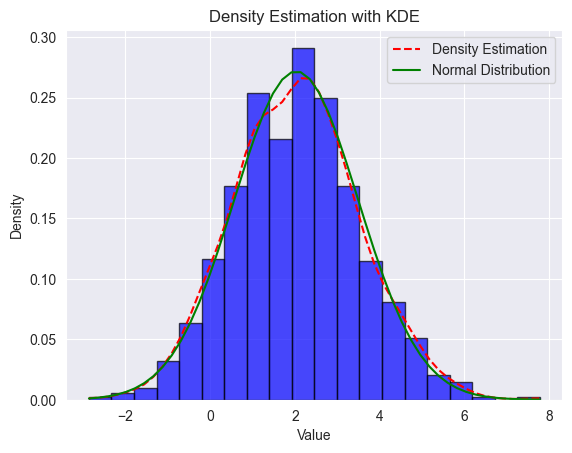

In [4]:
# Generate random data from a normal distribution
# np.random.seed(42)
data = np.random.normal(2, 1.5, size=1000)

# Plot the histogram with the density curve
plt.hist(data, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black')
x = np.linspace(data.min(), data.max())
kde = gaussian_kde(data)
estimated_y = kde(x)
plt.plot(x, estimated_y, color='red', linestyle='--', label='Density Estimation')

# Calculate the integral under the curve of the estimation
integral = np.trapz(estimated_y, x)
print("Integral under the curve of the estimation:", integral)

# Plot the true normal distribution curve centered around the mean of the data
true_y = norm.pdf(x, loc=np.mean(data), scale=np.std(data))
plt.plot(x, true_y, color='green', linestyle='-', label='Normal Distribution')

# Calculate the integral under the curve of the true normal distribution
integral = np.trapz(true_y, x)
print("Integral under the curve of the true distribution:", integral)

# Set plot title and labels, and show the legend
plt.title("Density Estimation with KDE")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

Integral under the curve of the estimation: 0.9964058646121227
Integral under the curve of the true distribution: 0.9976268203582165


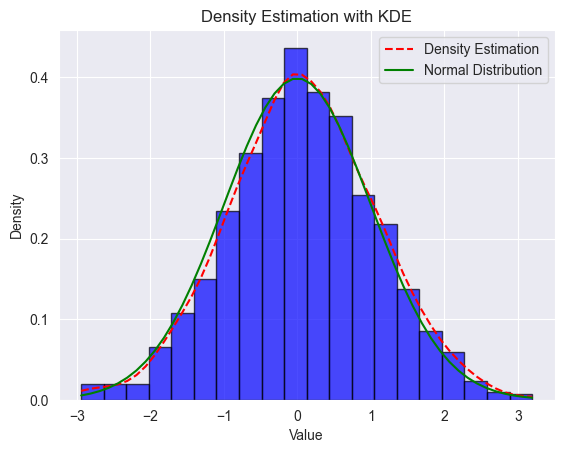

In [5]:
# Generate random data from a standard normal distribution
data = np.random.normal(0, 1, size=1000)
# data = np.random.standard_normal(size=1000)
# data = np.random.randn(1000)

# Plot the histogram with the density curve
plt.hist(data, bins=20, density=True, color='blue', alpha=0.7, edgecolor='black')
x = np.linspace(data.min(), data.max())
kde = gaussian_kde(data)
estimated_y = kde(x)
plt.plot(x, estimated_y, color='red', linestyle='--', label='Density Estimation')

# Calculate the integral under the curve of the estimation
integral = np.trapz(estimated_y, x)
print("Integral under the curve of the estimation:", integral)

# Plot the true normal distribution curve centered around the mean of the data
true_y = norm.pdf(x)
plt.plot(x, true_y, color='green', linestyle='-', label='Normal Distribution')

# Calculate the integral under the curve of the true normal distribution
integral = np.trapz(true_y, x)
print("Integral under the curve of the true distribution:", integral)

# Set plot title and labels, and show the legend
plt.title("Density Estimation with KDE")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

### Plot the density using matplotlib and seaborn

Check if the data is drawn from a normal distribution

In [6]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(data)

alpha = 0.05  # significance level

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value > alpha:
    print("The data is likely drawn from a normal distribution.")
else:
    print("The data is not likely drawn from a normal distribution.")

Shapiro-Wilk test statistic: 0.9255572415419708
P-value: 0.16213288691485317
The data is likely drawn from a normal distribution.


Matplotlib

Integral under the curve: 0.8621683677081177
Probability of 3 : 0.2659352907994043


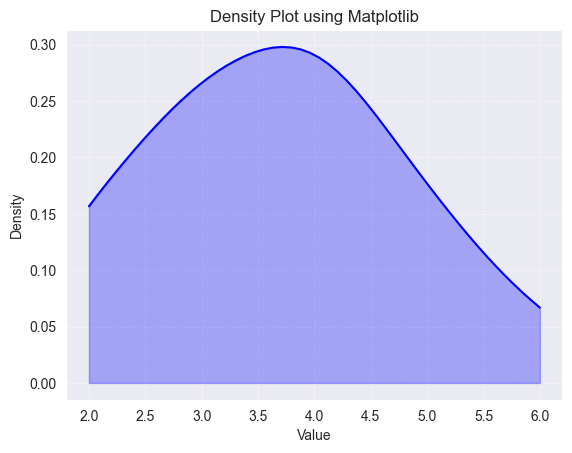

In [7]:
data = np.array([2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4])

# Calculate the kernel density estimate
kde = gaussian_kde(data)

# Create a range of values to evaluate the density at
x = np.linspace(data.min(), data.max())

# Evaluate the density at the given values
y = kde(x)

# Plot the density curve
plt.plot(x, y, color='blue')
plt.fill_between(x, 0, y, color='blue', alpha=0.3)
plt.title('Density Plot using Matplotlib')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)


# Calculate the integral under the curve using the trapezoidal rule
integral = np.trapz(y, x)
print("Integral under the curve:", integral)

# Calculate the probability of a specific value
value = 3
probability = np.interp(value, x, y)
print("Probability of", value, ":", probability)

Seaborn

Integral under the curve: 0.9996979799376668
Probability of 3 : 0.26598230290916003


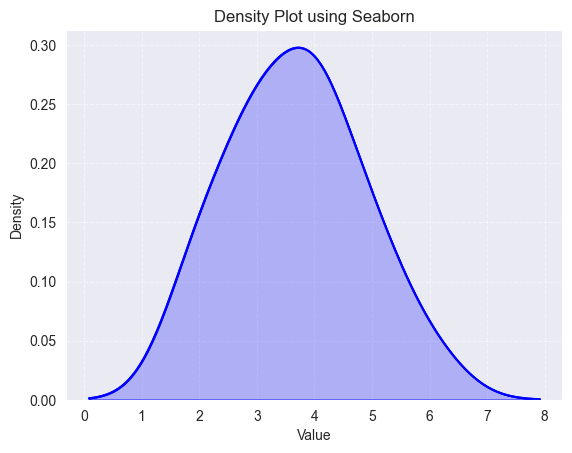

In [8]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

# Plot the density curve
sns.kdeplot(data, color='blue', fill=True)
plt.title('Density Plot using Seaborn')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

# Get the x and y values of the density curve
x = sns.kdeplot(data, color='blue').get_lines()[0].get_xdata()
y = sns.kdeplot(data, color='blue').get_lines()[0].get_ydata()

# Calculate the integral using the trapezoidal rule
integral = np.trapz(y, x)
print("Integral under the curve:", integral)

# Calculate the probability of a specific value
value = 3
probability = np.interp(value, x, y)
print("Probability of", value, ":", probability)

Calculate the probability of a data range

Probability of range [ 2 , 3 ]: 0.21262511039832685


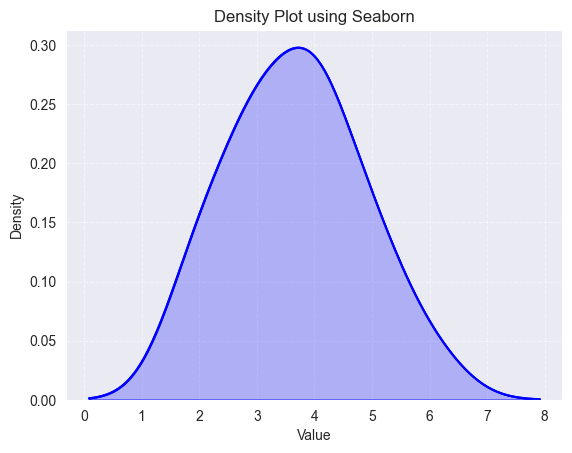

In [9]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

# Plot the density curve
sns.kdeplot(data, color='blue', fill=True)
plt.title('Density Plot using Seaborn')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

# Get the x and y values of the density curve
x = sns.kdeplot(data, color='blue').get_lines()[0].get_xdata()
y = sns.kdeplot(data, color='blue').get_lines()[0].get_ydata()

# Define the range of values
range_start = 2
range_end = 3

# Find the indices corresponding to the range of values
start_index = np.where(x >= range_start)[0][0]
end_index = np.where(x <= range_end)[0][-1]

# Calculate the probability of the range using trapezoidal integration
probability = np.trapz(y[start_index:end_index+1], x[start_index:end_index+1])
print("Probability of range [", range_start,",", range_end, "]:", probability)


Plot histogram in combination with density plot

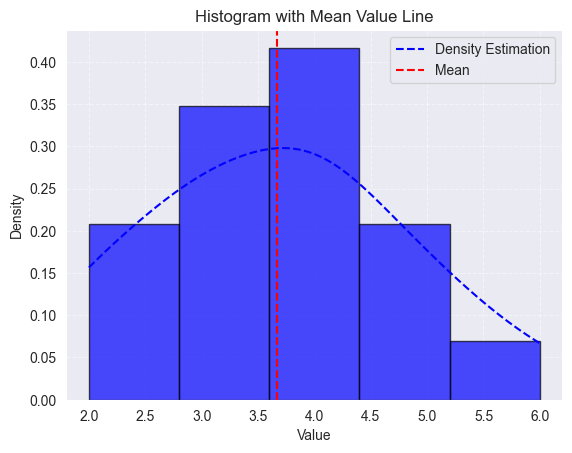

In [10]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

# Plot the histogram
plt.hist(data, bins=5, color='blue', edgecolor='black', alpha=0.7, density=True, zorder=2)

# Calculate and plot the kernel density estimation
density = gaussian_kde(data)
x = np.linspace(min(data), max(data), 100)
y = density(x)
plt.plot(x, y, color='blue', linestyle='--', label='Density Estimation')

# Calculate and plot the mean value line
mean_value = np.mean(data)
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')

plt.title("Histogram with Mean Value Line")
plt.xlabel("Value")
plt.ylabel("Density")

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

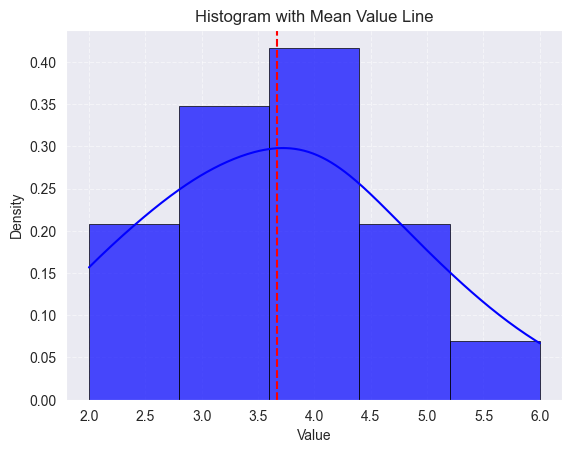

In [11]:
data = [2, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 2, 5, 4, 3, 4]

sns.histplot(data, bins=5, color='blue', edgecolor='black', alpha=0.7, linewidth=0.5, kde=True, stat='density', zorder=2)

mean_value = np.mean(data)
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')

plt.title("Histogram with Mean Value Line")
plt.xlabel("Value")
plt.ylabel("Density")

plt.grid(True, linestyle='--', alpha=0.5)

Plot two density plots using matplotlib

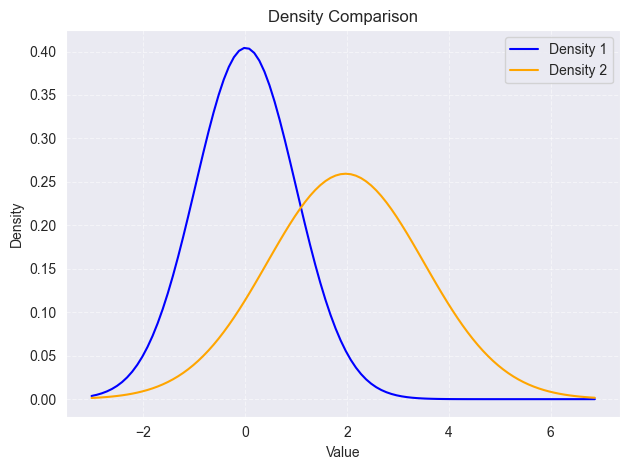

In [12]:
data1 = np.random.normal(0, 1, 1000)  # Z-distribution 68-95-99.7
data2 = np.random.normal(2, 1.5, 1000) # Normal distribution

# Calculate the overall minimum and maximum values
min_value = min(np.min(data1), np.min(data2))
max_value = max(np.max(data1), np.max(data2))

# Plotting the density curves
x = np.linspace(min_value, max_value, 100)
density1 = norm.pdf(x, loc=np.mean(data1), scale=np.std(data1))
plt.plot(x, density1, color='blue', linestyle='-', label='Density 1', zorder=2)

density2 = norm.pdf(x, loc=np.mean(data2), scale=np.std(data2))
plt.plot(x, density2, color='orange', linestyle='-', label='Density 2', zorder=2)

# Customizing the plot
plt.title("Density Comparison")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Displaying the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

Fill colors

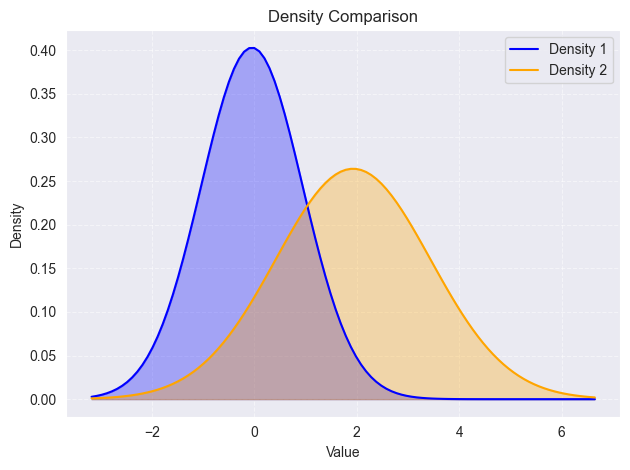

In [13]:
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(2, 1.5, 1000)

# Calculate the overall minimum and maximum values
min_value = min(np.min(data1), np.min(data2))
max_value = max(np.max(data1), np.max(data2))

# Plotting the density curves
x = np.linspace(min_value, max_value, 100)
density1 = norm.pdf(x, loc=np.mean(data1), scale=np.std(data1))
plt.plot(x, density1, color='blue', linestyle='-', label='Density 1')

density2 = norm.pdf(x, loc=np.mean(data2), scale=np.std(data2))
plt.plot(x, density2, color='orange', linestyle='-', label='Density 2')

# Shade the area under the density curves
plt.fill_between(x, density1, color='blue', alpha=0.3)
plt.fill_between(x, density2, color='orange', alpha=0.3)

# Customizing the plot
plt.title("Density Comparison")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Displaying the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

Plot two density plots using seaborn

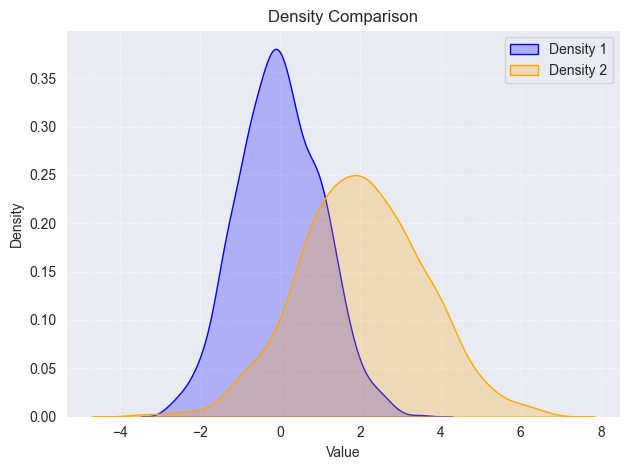

In [14]:
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(2, 1.5, 1000)

# Calculate the overall minimum and maximum values
min_value = min(np.min(data1), np.min(data2))
max_value = max(np.max(data1), np.max(data2))

# Plotting the density curves
sns.kdeplot(data1, color='blue', fill=True, label='Density 1')
sns.kdeplot(data2, color='orange', fill=True, label='Density 2')

# Customizing the plot
plt.title("Density Comparison")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Displaying the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

Use density plot for the Iris dataset

Text(5.843333333333334, -0.03, '5.84')

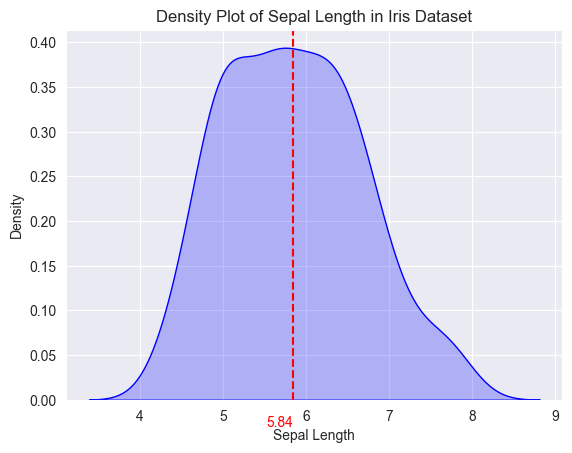

In [15]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Extract the sepal length data
sepal_length = iris['sepal_length']

# Calculate the mean value
mean_value = sepal_length.mean()

# Plot the density curve
sns.kdeplot(sepal_length, color='blue', fill=True)

# Add a vertical line for the mean value
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.title('Density Plot of Sepal Length in Iris Dataset')

# Add text for the mean value
plt.text(mean_value, -0.03, f'{mean_value:.2f}', color='red', ha='right')


Plot the density for all features

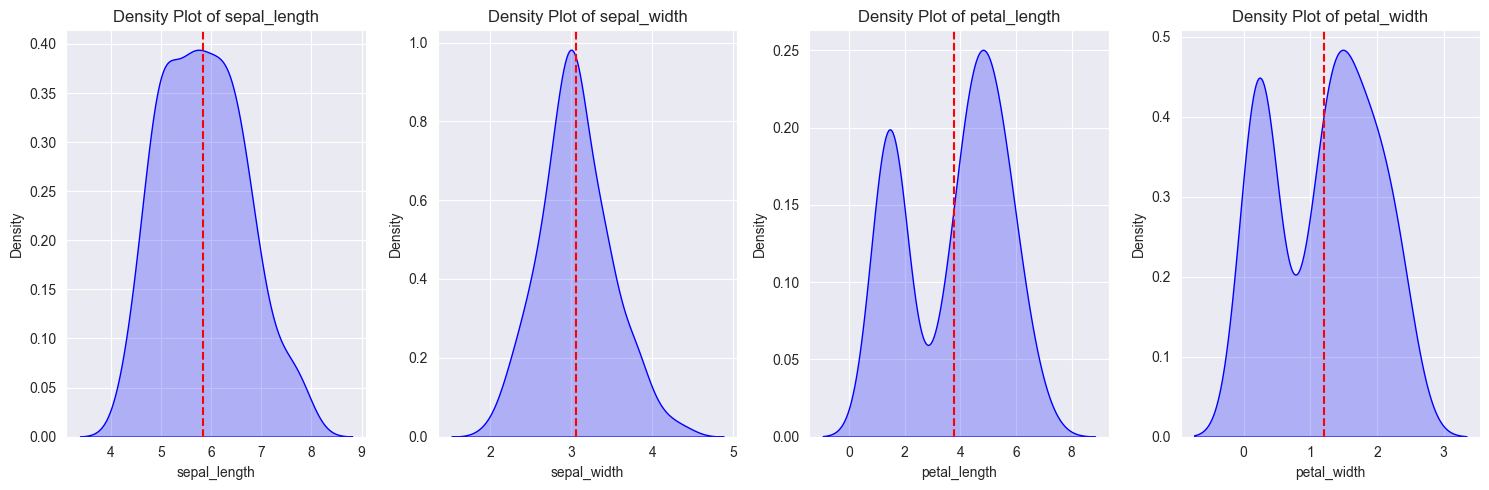

In [16]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Get the list of features
features = iris.columns[:-1]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

# Plot density curves for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(iris[feature], color='blue', fill=True, ax=ax)
    ax.axvline(iris[feature].mean(), color='red', linestyle='--', label='Mean')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Density Plot of {feature}')
    
# Adjust the spacing between subplots
plt.tight_layout()

Plot in multiple rows and columns

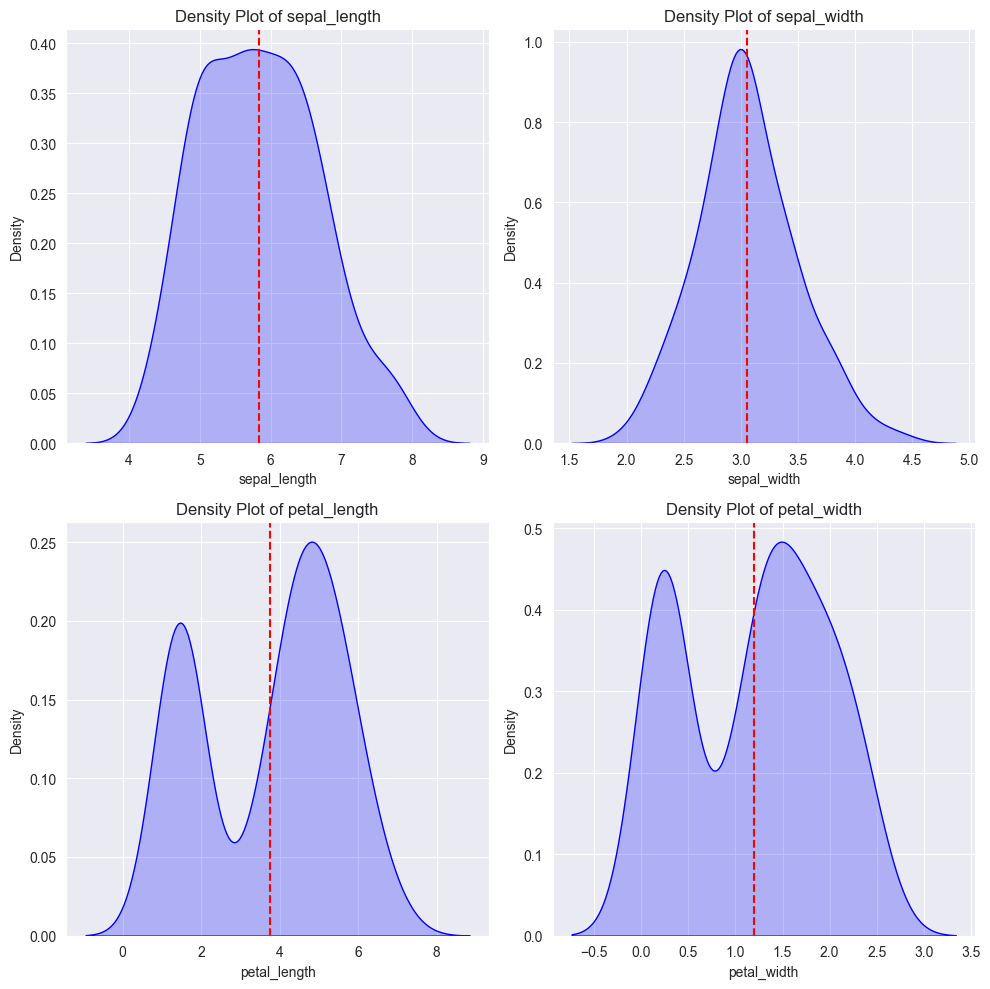

In [17]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Get the list of features
features = iris.columns[:-1]

# Calculate the number of rows and columns for the subplots
num_rows = len(features) // 2 + len(features) % 2
num_cols = 2

# Set up the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot density curves for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(iris[feature], color='blue', fill=True, ax=ax)
    ax.axvline(iris[feature].mean(), color='red', linestyle='--', label='Mean')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Density Plot of {feature}')

# Remove any unused subplots
if len(features) < num_rows * num_cols:
    for j in range(len(features), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()